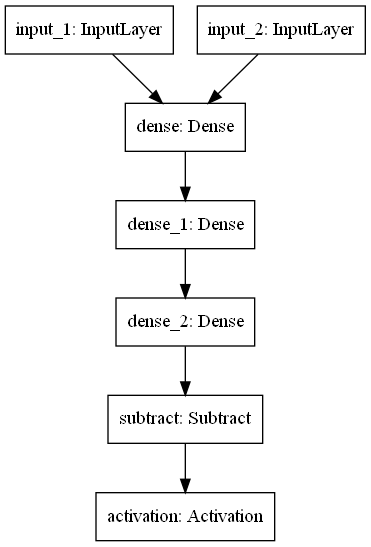

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu
import numpy as np
from itertools import combinations
from tensorflow.keras.utils import plot_model, Progbar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model architecture
class RankNet(Model):
    def __init__(self):
        super().__init__()
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dense(8, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    
    def build_graph(self):
        x = [Input(shape=(10)), Input(shape=(10))]
        return Model(inputs=x, outputs=self.call(x))

# visualize model architecture
plot_model(RankNet().build_graph(), show_shapes=False)

In [2]:
# generate data
nb_query = 20
query = np.array([i+1 for i in range(nb_query) for x in range(int(np.ceil(np.abs(np.random.normal(0,scale=15))+2)))])
doc_features = np.random.random((len(query), 10))
doc_scores = np.random.randint(5, size=len(query)).astype(np.float32)


In [3]:

# put data into pairs
xi = []
xj = []
pij = []
pair_id = []
pair_query_id = []
for q in np.unique(query):
    query_idx = np.where(query == q)[0]
    for pair_idx in combinations(query_idx, 2):
        pair_query_id.append(q)
        
        pair_id.append(pair_idx)
        i = pair_idx[0]
        j = pair_idx[1]
        xi.append(doc_features[i])
        xj.append(doc_features[j])
        
        if doc_scores[i] == doc_scores[j]:
            _pij = 0.5
        elif doc_scores[i] > doc_scores[j]:
            _pij = 1
        else: 
            _pij = 0
        pij.append(_pij)
        
xi = np.array(xi)
xj = np.array(xj)
pij = np.array(pij)
pair_query_id = np.array(pair_query_id)

xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, pair_id, test_size=0.2, stratify=pair_query_id)

In [6]:
# train model using compile and fit
ranknet = RankNet()
ranknet.compile(optimizer='adam', loss='binary_crossentropy')
history = ranknet.fit([xi_train, xj_train], pij_train, epochs=50, batch_size=1, validation_data=([xi_test, xj_test], pij_test))

Epoch 1/50
2476/2476 [==============================] - 4s 1ms/step - loss: 0.6842 - val_loss: 0.6741
Epoch 2/50
2476/2476 [==============================] - 3s 1ms/step - loss: 0.6700 - val_loss: 0.6592
Epoch 3/50
2476/2476 [==============================] - 3s 1ms/step - loss: 0.6576 - val_loss: 0.6548
Epoch 4/50
2476/2476 [==============================] - 4s 2ms/step - loss: 0.6428 - val_loss: 0.6360
Epoch 5/50
2476/2476 [==============================] - 3s 1ms/step - loss: 0.6291 - val_loss: 0.6277
Epoch 6/50
2476/2476 [==============================] - 4s 1ms/step - loss: 0.6160 - val_loss: 0.6098
Epoch 7/50
2476/2476 [==============================] - 3s 1ms/step - loss: 0.6045 - val_loss: 0.6015
Epoch 8/50
2476/2476 [==============================] - 3s 1ms/step - loss: 0.5899 - val_loss: 0.5975
Epoch 9/50
2476/2476 [==============================] - 4s 1ms/step - loss: 0.5749 - val_loss: 0.5883
Epoch 10/50
2476/2476 [==============================] - 4s 2ms/step - loss: 0.564

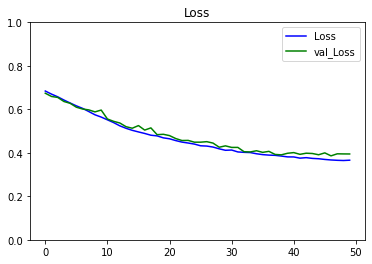

In [7]:
# function for plotting loss
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(train_metric,color='blue',label=metric_name)
    if val_metric is not None: plt.plot(val_metric,color='green',label='val_' + metric_name)
    plt.legend(loc="upper right")

# plot loss history
plot_metrics(history.history['loss'], history.history['val_loss'], "Loss", "Loss", ylim=1.0)

# Herunder prøver vi med vores egen

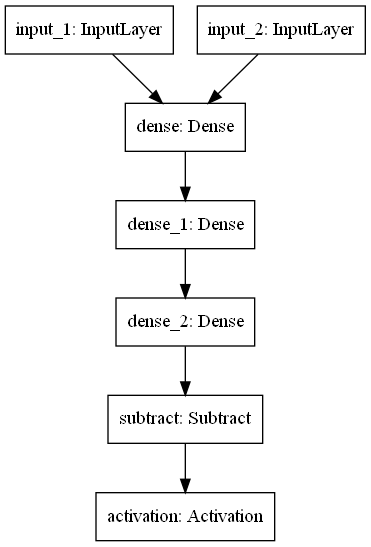

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu
import numpy as np
from itertools import combinations
from tensorflow.keras.utils import plot_model, Progbar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
import pydot_ng as pydot
pydot.find_graphviz()

# model architecture
class RankNet(Model):
    def __init__(self):
        super().__init__()
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dense(8, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    
    def build_graph(self):
        x = [Input(shape=(10)), Input(shape=(10))]
        return Model(inputs=x, outputs=self.call(x))

# visualize model architecture
plot_model(RankNet().build_graph(), show_shapes=False)

In [5]:
import pandas as pd
# Loading the data
df = pd.read_csv("df_sum_score_py.csv")
# C:\Dokumenter\Dokumenter\UNI\7.semester\Bachelor\Bachelor_Gabi_Kat\src\Algoritmer\df_sum_score_py.csv

# Creating the data
# features
df_document_features = df.copy()
df_document_features = df_document_features[["GENDER_bin", "HI_GRADE_AVG"]]
df_document_features = df_document_features.values.tolist()
doc_features = np.array(df_document_features)
#scores
doc_scores = df["COL_GRADE_AVG"].values

query = df.index.values

df

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,F,Stratum 4,81,61,82,93,71,93,85.666667,74.666667,1
1,1,F,Stratum 5,75,66,88,38,86,98,74.000000,76.333333,1
2,2,M,Stratum 2,49,38,42,1,18,43,20.666667,43.000000,0
3,3,F,Stratum 2,55,51,73,35,76,80,63.666667,59.666667,1
4,4,M,Stratum 4,65,76,92,94,98,100,97.333333,77.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum 2,69,70,81,71,86,87,81.333333,73.333333,0
12407,12407,M,Stratum 2,57,61,53,39,44,11,31.333333,57.000000,0
12408,12408,M,Stratum 2,69,75,58,88,90,81,86.333333,67.333333,0
12409,12409,F,Stratum 3,69,64,52,80,51,8,46.333333,61.666667,1


In [7]:
# nb_query = 100
# query_q = np.array([i+1 for i in range(nb_query) for x in range(int(np.ceil(np.abs(np.random.normal(0,scale=15))+2)))])


# put data into pairs
xi = []
xj = []
pij = []
pair_id = []
pair_query_id = []
# pdb.set_trace()

# for q in np.unique(query_q):
#     query_idx_q = np.where(query_q == q)[0]

for pair_idx in combinations(query, 2):
    pair_query_id.append(q)
    pair_id.append(pair_idx)
    i = pair_idx[0]
    j = pair_idx[1]
    xi.append(doc_features[i])
    xj.append(doc_features[j])

    if doc_scores[i] == doc_scores[j]:
        _pij = 0.5
    elif doc_scores[i] > doc_scores[j]:
        _pij = 1
    else:
        _pij = 0
    pij.append(_pij)  

# for q in np.unique(query):
#     query_idx = np.where(query == q)[0] # den når hertil og har empty query_idx
#     # pdb.set_trace()
#     for pair_idx in combinations(query_idx, 2):
#         pair_query_id.append(q)
#         pair_id.append(pair_idx)
#         i = pair_idx[0]
#         j = pair_idx[1]
#         xi.append(doc_features[i])
#         xj.append(doc_features[j])

#         if doc_scores[i] == doc_scores[j]:
#             _pij = 0.5
#         elif doc_scores[i] > doc_scores[j]:
#             _pij = 1
#         else:
#             _pij = 0
#         pij.append(_pij)

# pdb.set_trace()

xi = np.array(xi)
xj = np.array(xj)
pij = np.array(pij)
pair_query_id = np.array(pair_query_id)


xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, pair_id, test_size=0.2, stratify=pair_query_id)
# xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
#     xi, xj, pij, pair_id, test_size=0.2, shuffle=True)

stratify=True
stratify=False

In [14]:
# train model using compile and fit
ranknet = RankNet()
ranknet.compile(optimizer='adam', loss='binary_crossentropy')
history = ranknet.fit([xi_train, xj_train], pij_train, epochs=50, batch_size=1, validation_data=([xi_test, xj_test], pij_test))

Epoch 1/200
39816/39816 [==============================] - 59s 1ms/step - loss: 0.1870 - val_loss: 0.1613
Epoch 2/200
39816/39816 [==============================] - 63s 2ms/step - loss: 0.1611 - val_loss: 0.1656
Epoch 3/200
39816/39816 [==============================] - 56s 1ms/step - loss: 0.1604 - val_loss: 0.1586
Epoch 4/200
39816/39816 [==============================] - 58s 1ms/step - loss: 0.1598 - val_loss: 0.1588
Epoch 5/200
39816/39816 [==============================] - 49s 1ms/step - loss: 0.1593 - val_loss: 0.1617
Epoch 6/200
39816/39816 [==============================] - 51s 1ms/step - loss: 0.1590 - val_loss: 0.1617
Epoch 7/200
39816/39816 [==============================] - 49s 1ms/step - loss: 0.1588 - val_loss: 0.1586
Epoch 8/200
39816/39816 [==============================] - 47s 1ms/step - loss: 0.1586 - val_loss: 0.1616
Epoch 9/200
39816/39816 [==============================] - 46s 1ms/step - loss: 0.1585 - val_loss: 0.1591
Epoch 10/200
39816/39816 [====================

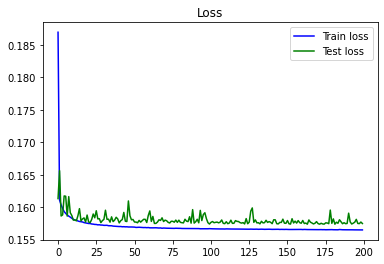

In [17]:
# function for plotting loss
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)
    # plt.ylim(0,ylim)
    plt.plot(train_metric,color='blue',label=metric_name)
    if val_metric is not None: plt.plot(val_metric,color='green',label='val_' + metric_name)
    # plt.legend(loc="upper right")
    plt.legend(['Train loss', 'Test loss'], loc='upper right')

# plot loss history
plot_metrics(history.history['loss'], history.history['val_loss'], "Loss", "Loss", ylim=1.0)
plt.savefig("200_epoch_RankNet_loss.png")

In [ ]:
# Eventuelt sætte denne ind i stedet for den nuværende plt.legend : plt.legend(['train', 'test'], loc='upper left')

Den underfitter i hvert fald ikke, men jeg ved ikke helt om den overfitter. 
Den blå er training loss. 

Overfitting: These more complex models can lead to a phenomenon known as overfitting the data, which essentially means they follow the errors, or noise, too closely.


Her skal vi formentlig kigge på crossvalidation. 
Vi kunne også benytte regularization i form af dropout på det neurale netværk. 